# Replicating some key images of Future Climate

This notebook demonstrates how create a couple of the key images of future climate directly from (processed) climate model data. This is the first time that you're playing with climate model output. In this instance, the key take home is the pattern and trends in surface temperature. We are devoting a week of term each to learning about the UKESM1-0-LL model and the post-processing software after Reading Week. 

Most features are available in the original `geog0111` environment, but the last time series image will fail unles you use the `geog0121` virtual environment. Instructions about how to install this environment are provided on Moodle (If you are using `conda` to install on your own machine there is a  `environment.yml` file provided).

### Import packages and define functions for calculations

In [1]:
'''Import packages for loading data, analysing, and plotting'''

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import os
import cftime
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Change in annual temperature under the SSP585 scenario
Here we use the (post-processed) output file from the SSP585 scenario to look at the change in annual mean surface temperature

In [2]:
#Set some variables to decide what to plot
end_period='2071-2100'
start_period='1851-1900'
ssp='ssp585'

In [3]:
#Specify the paths to the data files. These lines are specific to UCL's JupyterHub - please see the bottom of the notebook for equivalent code blocks on other systems 
shared_summary_directory='~/geog0121_shared_space/UKESM1_summary_files'
filename_a='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(shared_summary_directory,ssp,end_period)
filename_b='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(shared_summary_directory,ssp,start_period)

In [4]:
# load files
expt_a_file=xr.open_dataset(filename_a,decode_times=False)
expt_b_file=xr.open_dataset(filename_b,decode_times=False)
# load the coordinates
lat=expt_a_file['lat']
lon=expt_a_file['lon']
# load the variables themselves
variable_name='tas_spatialmean_ann'
expt_a=expt_a_file[variable_name]
expt_b=expt_b_file[variable_name]

# create the difference
diff=expt_a-expt_b
diff

<xarray.DataArray 'tas_spatialmean_ann' (lat: 144, lon: 192)>
array([[ 5.959347 ,  5.953102 ,  5.9500237, ...,  5.969921 ,  5.966202 ,
         5.9635735],
       [ 5.747055 ,  5.746517 ,  5.748188 , ...,  5.7464523,  5.7471695,
         5.747734 ],
       [ 5.647171 ,  5.6419716,  5.640442 , ...,  5.6496315,  5.650158 ,
         5.650383 ],
       ...,
       [18.979141 , 19.00819  , 19.045362 , ..., 18.89346  , 18.913742 ,
        18.946976 ],
       [19.164965 , 19.185349 , 19.2098   , ..., 19.091599 , 19.118242 ,
        19.14282  ],
       [19.32052  , 19.322361 , 19.324844 , ..., 19.315073 , 19.317566 ,
        19.318928 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1

### Using xarray's simplest plotting routine

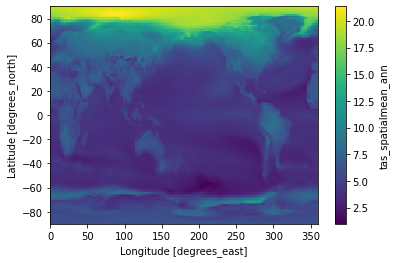

In [5]:
diff.plot()

Whilst this plot clearly show what is going on. It is missing several useful features:
* A sensible colormap
* The coastline (or country borders) to help orientate you
* A logical scale for the colors to use

Whatever you decide to plot, it is always worth selecting a relevant colormap. All of the easily available colormaps can be seen at [Matplotlib's reference pages](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html). For this instance, I am picking a sequential one that goes from yellow-orange-red (YlOrRd), with the keyword `cmap=` in the plot call.

Here I am going to plot every 2 degrees above preindustrial, using both the `levels` keyword and a call to `np.linspace()`, which subdivides the range from 0-20 (inclusive) into 11 different levels. 

Adding the map is a little trickier. We shall use the Robinson projection, but we need to specify that first along with a load of other map-related options to creates some axes. We then also need to pass these to the plotting routine, as well as telling it us the Plate Carree method to map the locations onto the Robinson projection. 

A final thing to note is that we've switched to using `contourf` instead of the default option (actually `pcolormesh`). This is needed for the maps, and will otherwise throw up errors like 
> 'GeoAxesSubplot' object has no attribute '_hold'


/opt/conda/envs/geog0121/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/conda/envs/geog0121/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/conda/envs/geog0121/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/opt/conda/envs/geog0121/lib/python3.9/site-packages/cartopy/crs.py

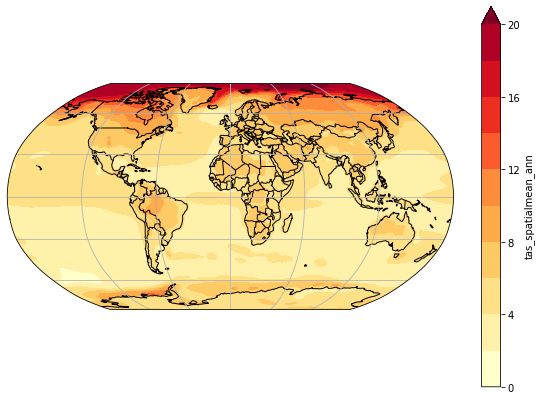

In [6]:
# Define the map projection through an "axes" call
plt.figure(figsize=(10,7)) #make the map itself nice and big
projection = cartopy.crs.Robinson() #specify the Robinson projection
ax = plt.axes(projection=projection) #create the axes
ax.coastlines() # add the coastlines
ax.gridlines() # add some gray gridlines 
ax.add_feature(cartopy.feature.BORDERS) #add the country borders

# Now overplot the map onto these axes. 
fig=diff.plot.contourf(ax=ax, transform=cartopy.crs.PlateCarree(), \
                       cmap='YlOrRd', \
                       levels=np.linspace(0,20,11))

# [note that its given a name of `fig` through the =, so that it can saved later]



This figure is roughly equivalent to the RCP8.5 panel in the Summary for Policy Makers of the AR5 Synthesis report (https://www.ipcc.ch/report/ar5/syr/summary-for-policymakers/spm-07_rev1-01/):

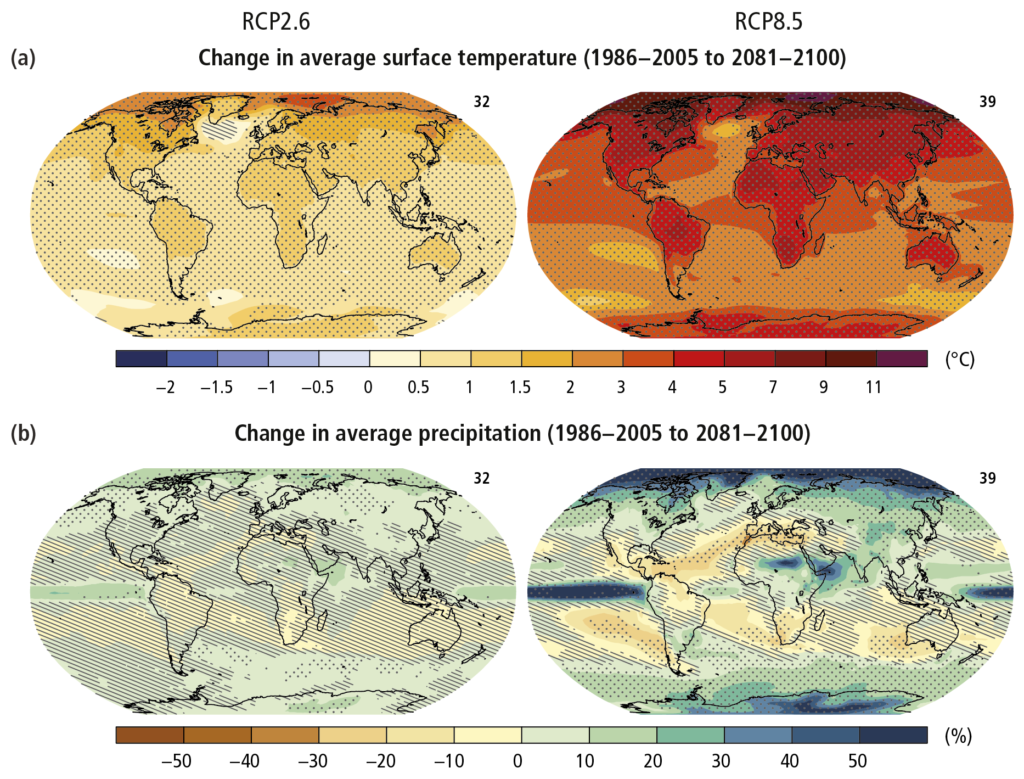

The color scale is obviously different. We are also using a single simultion (UKESM1) instead of an ensemble mean. Our baseline from which we are calculating the change is also different. You can certainly see the main features being replicated though.



# Comparison between different scenarios

The primary figure shown to demonstrate future climate change in the IPCC looks at the development of global mean temperature under several different scenarios:

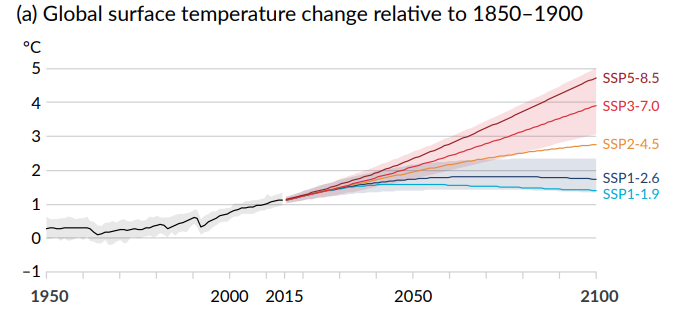

In [7]:
# Load in the two scenarios...
shared_summary_directory='~/geog0121_shared_space/UKESM1_summary_files'
filename126='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(shared_summary_directory,'ssp126','1981-2010')
filename370='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(shared_summary_directory,'ssp370','1981-2010')

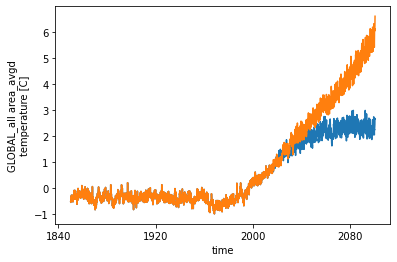

In [9]:
#Start with SSP126
# open the file to get the data
ssp126=xr.open_dataset(filename126)
# create a plot of the variable called ipcc_GLOBAL_all_tas
ssp126.ipcc_GLOBAL_all_tas.plot() #by default the first line is blue


#Then move onto SSP370
# open the file to get the data
ssp370=xr.open_dataset(filename370)
# create a plot of the variable called ipcc_GLOBAL_all_tas
ssp370.ipcc_GLOBAL_all_tas.plot() #by default the second line is orange

This figure obvious looks slightly different, because we are using a single model simulation. We can't do anything about that. 

But we can make another couple of edits to make it more similar...

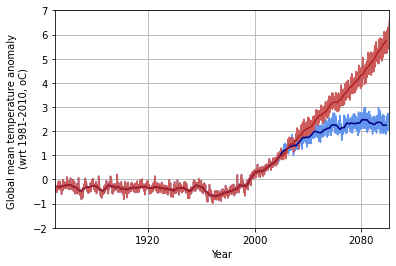

In [10]:
# Take the annual means, to remove some internal variability
GMT_126=ssp126.ipcc_GLOBAL_all_tas #choose just the global mean timeseries
GMT_126_smoothed=GMT_126.rolling(time=60,center=True).mean() #take the 5-year running mean (i.e. rolling over 60 months)
GMT_126_annual=GMT_126.rolling(time=12,center=True).mean() #take the mean of it for each year
GMT_370=ssp370.ipcc_GLOBAL_all_tas
GMT_370_smoothed=GMT_370.rolling(time=60,center=True).mean()

# Make the plot itself
fig=GMT_126.plot(color='cornflowerblue')
fig=GMT_370.plot(color='indianred')
fig=GMT_126_smoothed.plot(color='navy') #by default the first line is blue
fig=GMT_370_smoothed.plot(color='firebrick') #by default the second line is orange

# relabel the y axis
plt.ylabel('Global mean temperature anomaly \n (wrt 1981-2010, oC)') #The \n character indicates a new line
# relabel the x axis
plt.xlabel('Year')

#Constraining the horizontal axis is more awkward
start_date=cftime.Datetime360Day(1850,1,1,0,0,0)
end_date=cftime.Datetime360Day(2100,12,30,0,0,0)
# alter the limits of the axes
plt.axis([start_date,end_date, -2, 7]) #[xmin, xmax, ymin, ymax]; Note that the years are strings 
# add a grid in the background
plt.grid(True)


*Note that if this fails with a message about the time axis, this is a fault with the incorrect package pythons*

This looks more like the plot in the IPCC. You may notice that we couldn't keep the maximum of the Y-axis at +6, because the warming in UKESM1 goes above that. This is because UKESM1 has a high climate senstivity. This is something to bear in mind for the discussion in your practical write-up. Worryingly though it is not the only CMIP6 model with a high climate sensitivity - see __[this post at Carbon Brief for further details](https://www.carbonbrief.org/cmip6-the-next-generation-of-climate-models-explained)__ and we will talk about this more after Reading Week. 

## *Machine specific options*

This code above is intended to be run on UCL's JupyterHub facility. However it might happen that you need to run this notebook on a different machine. In the cell below, you will find the code to run on a python installation on your own machine.

In [8]:
#FOR YOUR OWN LAPTOP: define filenames, and download if required
filename_a='Data/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp370','2071-2100')
filename_b='Data/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp370','1851-1900')
filename126='Data/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp126','1981-2010')
filename370='Data/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp370','1981-2010')

#Download the files if they are not already here
import os
import urllib
if not os.path.isfile(filename_a):
    print('Downloading %s' %(filename_a))
    !mkdir Data
    url_a='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp370','2071-2100')
    urllib.request.urlretrieve(url_a, filename_a)    
    
if not os.path.isfile(filename_b):
    print('Downloading %s' %(filename_b))
    url_b='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp370','1851-1900')
    urllib.request.urlretrieve(url_b, filename_b)
    
if not os.path.isfile(filename126):
    print('Downloading %s' %(filename126))
    !mkdir Data
    url_126='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp126','1981-2010')
    urllib.request.urlretrieve(url_126, filename126)    

if not os.path.isfile(filename370):
    print('Downloading %s' %(filename370))
    !mkdir Data
    url_370='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp370','1981-2010')
    urllib.request.urlretrieve(url_370, filename370)    
